In [531]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [532]:

df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [533]:
df.shape

(13320, 9)

In [534]:
dos = df.drop(['area_type','society','balcony','availability'],axis = 'columns')
dos.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [535]:
dos.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [536]:
tres = dos.dropna()
tres.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [537]:
tres['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [538]:
tres['bhk'] = tres['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\star1\AppData\Local\Temp\ipykernel_15700\1127208224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tres['bhk'] = tres['size'].apply(lambda x: int(x.split(' ')[0]))


In [539]:
tres.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [540]:
tres['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [541]:
tres[tres.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [542]:
tres.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [543]:
def is_float (x):
    try:
        float(x)
    except:
        return False
    return True 




In [544]:
tres[~tres['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [545]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None


In [546]:
convert_sqft_to_num('2166')

2166.0

In [547]:
quatros = tres.copy()
quatros['total_sqft'] = quatros['total_sqft'].apply(convert_sqft_to_num)
quatros.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [548]:
quatros.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [549]:
cinq = quatros.copy()
cinq['pricepersqft'] = cinq['price'] * 100000/cinq['total_sqft']
cinq.head()

,location,size,total_sqft,bath,price,bhk,pricepersqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [550]:
len(cinq.location.unique())

1304

In [551]:
cinq.location = cinq.location.apply(lambda x: x.strip())
location_stats = cinq.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [552]:
len(location_stats[location_stats<=10])


1052

In [553]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [554]:
len(cinq.location.unique())


1293

In [555]:
cinq.location = cinq.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(cinq.location.unique())

242

In [556]:
cinq[cinq.total_sqft/cinq.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,pricepersqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [557]:
aaru = cinq[-(cinq.total_sqft/cinq.bhk<300)]
aaru.shape

(12502, 7)

In [558]:
aaru.pricepersqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: pricepersqft, dtype: float64

In [559]:
def removeoutliers(df):
    outdataframe = pd.DataFrame()
    for key, subdataframe in df.groupby('location'):
        mean = np.mean(subdataframe.pricepersqft)
        standarddeviation = np.std(subdataframe.pricepersqft)
        reduceddataframe = subdataframe[(subdataframe.pricepersqft > (mean - standarddeviation)) & 
                                        (subdataframe.pricepersqft <= (mean + standarddeviation))]
        outdataframe = pd.concat([outdataframe, reduceddataframe], ignore_index=True)
    return outdataframe

yallu = removeoutliers(aaru)
yallu.shape

            

(10241, 7)

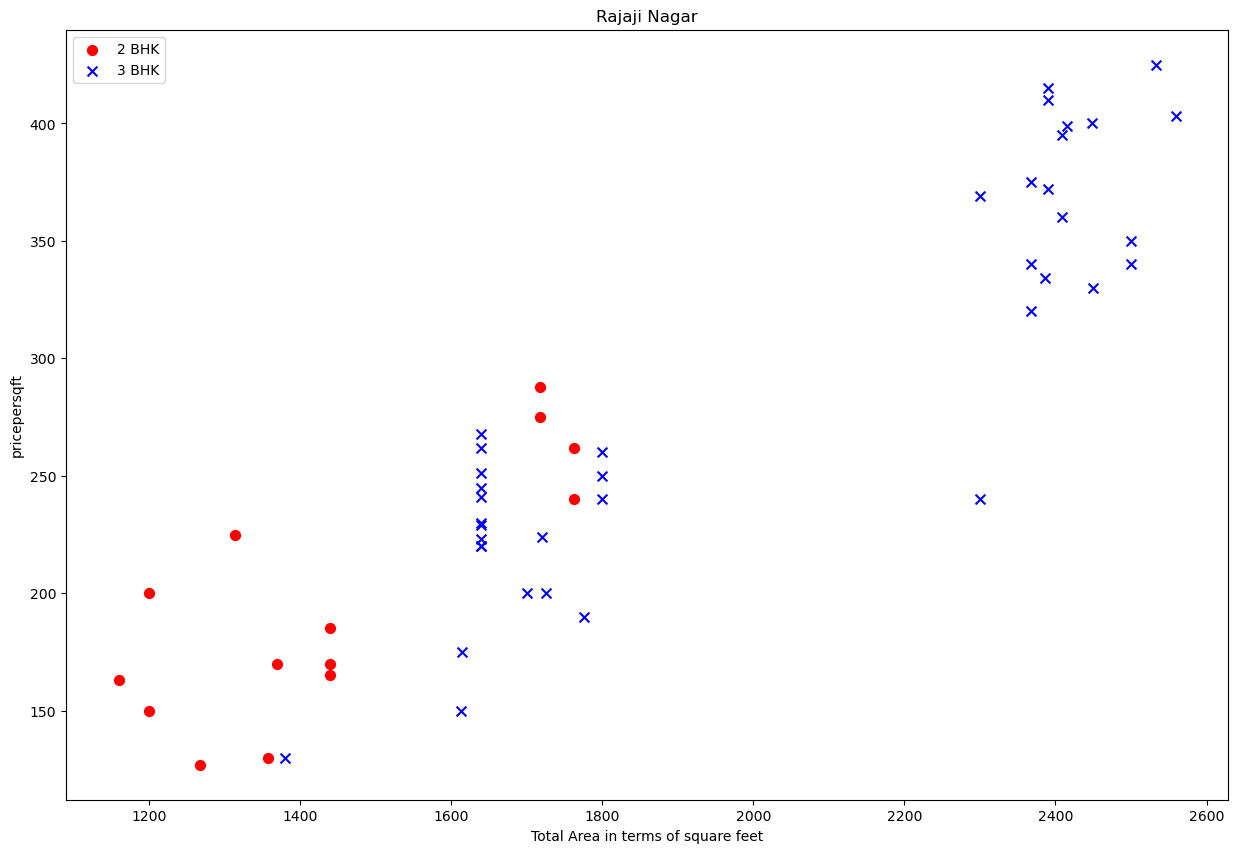

In [589]:
def makeascatterplotchart(df,location):
    twobedroom = df[(df.location==location) & (df.bhk==2)]
    threebedroom = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(twobedroom.total_sqft,twobedroom.price,color= 'red',label= '2 BHK', s=50)
    plt.scatter(threebedroom.total_sqft,threebedroom.price,marker = 'x', color= 'blue',label='3 BHK', s=50)
    plt.xlabel("Total Area in terms of square feet")
    plt.ylabel("pricepersqft")
    plt.title(location)
    plt.legend()
makeascatterplotchart(yallu,"Rajaji Nagar")

In [561]:
def removebedroomoutliers(df):
    excludedvalues = np.array([])
    for location, locationdataframe in df.groupby('location'):
        bedroomstats = {}
        for bhk, bhkdataframe in locationdataframe.groupby('bhk'):
            bedroomstats[bhk] = {
                'mean': np.mean(bhkdataframe.pricepersqft),
                'std':np.std(bhkdataframe.pricepersqft),
                'count': bhkdataframe.shape[0]
            }
        for bhk, bhkdataframe in locationdataframe.groupby('bhk'):
            stats = bedroomstats.get(bhk-1)
            if stats and stats['count']>5:
                excludedvalues = np.append(excludedvalues, bhkdataframe[bhkdataframe.pricepersqft<(stats['mean'])].index.values)
    return df.drop(excludedvalues,axis = 'index')
    
ahttu=removebedroomoutliers(yallu)
ahttu.shape


(7329, 7)

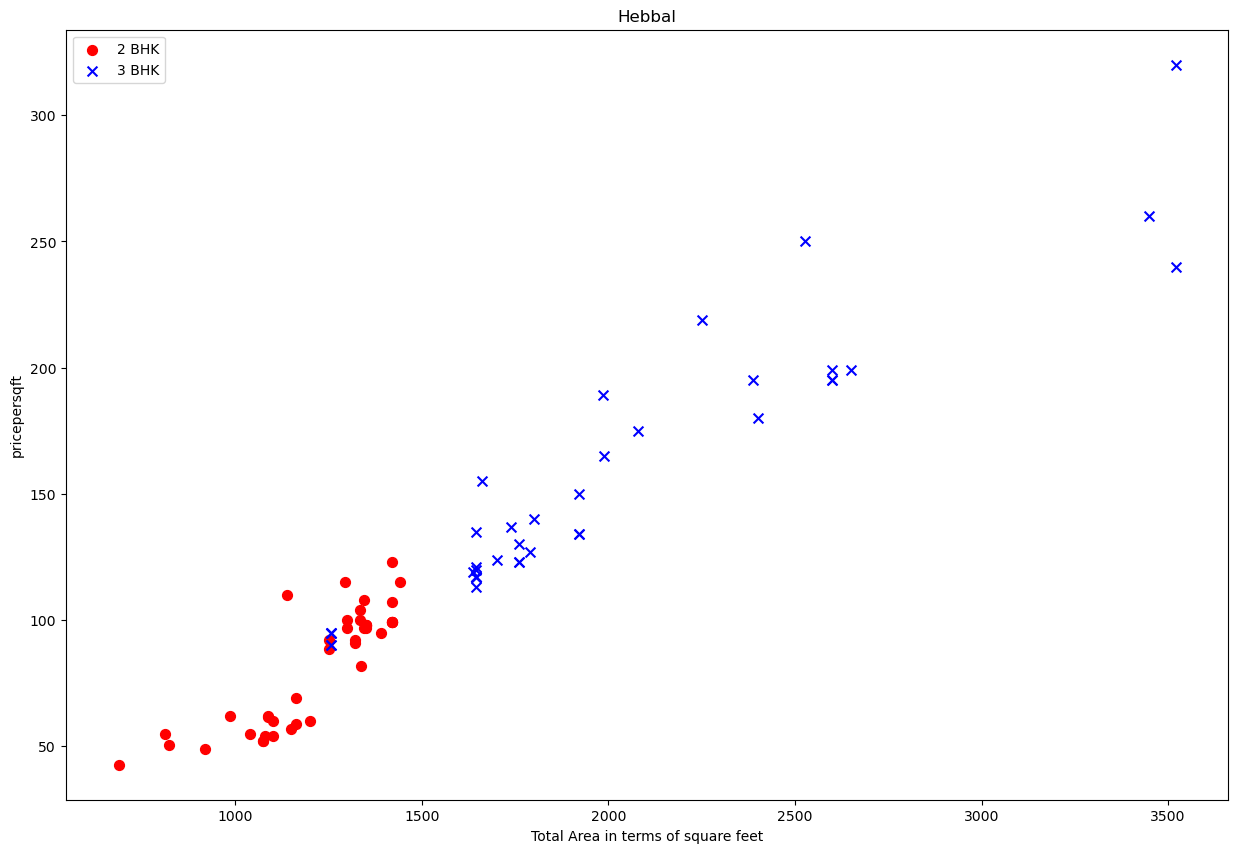

In [594]:
makeascatterplotchart(ahttu,"Hebbal")

Text(0, 0.5, 'Count')

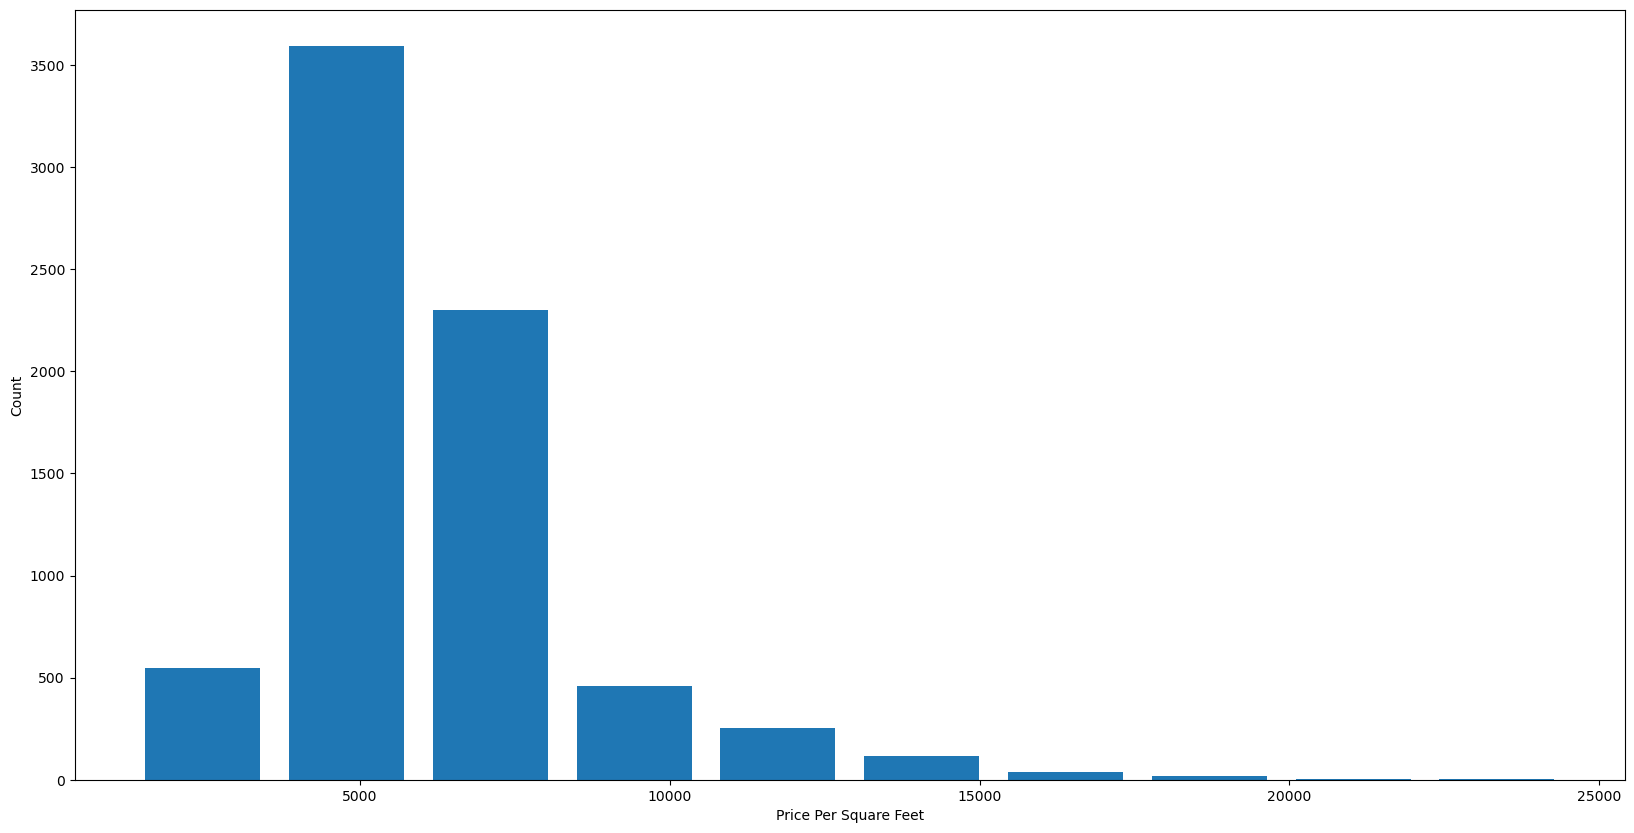

In [563]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(test.pricepersqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [592]:
ahttu.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [595]:
ahttu[ahttu.bath>10]


,location,size,total_sqft,bath,price,bhk,pricepersqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [566]:
dos = df.drop(['area_type','society','balcony', 'availability'],axis = 'columns')
dos.shape

(13320, 5)

In [596]:
ahttu[ahttu.bath>ahttu.bhk+2]

,location,size,total_sqft,bath,price,bhk,pricepersqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [568]:
yampothu = ahttu[ahttu.bath<ahttu.bath+2]
yampothu.shape

(7329, 7)

In [569]:
patthu = yampothu.drop(['size','pricepersqft'],axis = 'columns')
patthu.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [570]:
dummy = pd.get_dummies(patthu.location)
dummy.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [571]:
yohenna = pd.concat([patthu,dummy.drop('other',axis = 'columns')],axis = 'columns')
yohenna.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [572]:
yodool = yohenna.drop('location',axis = 'columns')
yodool.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [573]:
yodool.shape

(7329, 245)

In [574]:
X = yodool.drop('price', axis='columns')
X.head()


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [575]:
y = yodool.price
y.head()



0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [576]:
X = X.values
y = y.values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [603]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8909987705740925

In [604]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)




array([0.81924325, 0.86698523, 0.86457433, 0.8857566 , 0.86309462])

In [579]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [606]:
def makeapredictionofprices(location,sqft,bath,bhk):
    locationindex = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
   
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if locationindex >= 0:
        x[locationindex] = 1
    return lr_clf.predict([x])[0]

makeapredictionofprices('1st Phase JP Nagar', 1000, 2,2)

C:\Users\star1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.2807480015048

In [610]:
makeapredictionofprices('1st Phase JP Nagar', 1000, 3,3)


C:\Users\star1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75073454238405

In [581]:
def predict(location,sqft,bath,bhk):
    locationindex = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
   
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if locationindex >= 0:
        x[locationindex] = 1
    return lr_clf.predict([x])[0]

predict('1st Phase JP Nagar', 1000,2,2)


C:\Users\star1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.2807480015048

In [611]:
predict('1st Phase JP Nagar', 1000, 3,3)

C:\Users\star1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75073454238405